<a href="https://colab.research.google.com/github/radhakrishnan-omotec/mentalhealth-repo/blob/main/Template_2_Arush_kapur_project_updated_19_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### An In-Depth Analysis of Crowdfunding Dynamics: Unveiling Market Opportunities and Financial Inclusion Strategies

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## in order to show more columns.
pd.options.display.max_columns = 999

### Loading the Datasets

In [ ]:
## From Data Science for good: Kiva funding.
kiva_loans = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/November, 2023/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/kiva_loans.csv")
loan_themes = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/November, 2023/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/loan_themes_by_region.csv")
mpi_region_locations = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/November, 2023/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/kiva_mpi_region_locations.csv")

## From additional data sources.
country_stats = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/November, 2023/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/country_stats.csv")
countries = pd.read_csv("/content/drive/MyDrive/projects_to_work_on/November, 2023/Crowdfunding_Data_Analysis_Borrower_Profiling_and_Strategic_Loan_Product_Development/Dataset/countries_of_the_world.csv")


### Exploring the available datasets

In [ ]:
loan_themes.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,7,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,1383,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,3,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
# Renaming the columns
loan_themes.rename(columns={'Field Partner Name':'field_partner_name',
                            'Loan Theme ID':'loan_theme_id',
                            'Loan Theme Type':'loan_theme_type',
                            'Partner ID':'partner_id'}, inplace = True)


In [ ]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [ ]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


### The Multidimensional Poverty Index is a measure used to assess poverty by considering multiple dimensions of well-being beyond income or monetary factors alone. It provides a more comprehensive understanding of poverty by taking into account various indicators related to health, education, and standard of living.

### The MPI was developed by the Oxford Poverty and Human Development Initiative (OPHI) and the United Nations Development Programme (UNDP). It identifies individuals or households as multidimensionally poor if they are deprived in multiple indicators within these key dimensions.

### The indicators used in the MPI can include factors such as nutrition, child mortality, years of schooling, school attendance, cooking fuel, sanitation, safe drinking water, electricity, and housing. By considering a range of dimensions, the MPI provides a more nuanced and accurate picture of poverty, helping policymakers and researchers design more targeted interventions to address the diverse aspects of deprivation that people may face.

In [ ]:
kiva_loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


### Number of countries for which we have data

In [ ]:
kiva_loans['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [ ]:
len(kiva_loans['country'].unique())

87

### Period for which we have the loan data

In [ ]:
# Convert 'date' column to datetime type
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'], errors='coerce')

# Find the lowest and highest dates
lowest_date = kiva_loans['date'].min()
highest_date = kiva_loans['date'].max()

# Print the results
print("Lowest Date: {}".format(lowest_date))
print("Highest Date: {}".format(highest_date))

Lowest Date: 2014-01-01 00:00:00
Highest Date: 2017-07-26 00:00:00


#### 1. Countries with Most number of loans vs Maximum Total Loan Amount

In [ ]:
import matplotlib.pyplot as plt

# Data preparation
countries_loan_counts = kiva_loans['country'].value_counts().head(5).sort_values(ascending=False)
countries_donation_amounts = kiva_loans.groupby(['country'])['funded_amount'].sum().sort_values(ascending=False).head(5)

In [ ]:
countries_loan_counts.index

Index(['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan'], dtype='object')

In [ ]:
countries_loan_counts.values

array([160441,  75825,  39875,  34836,  26857])

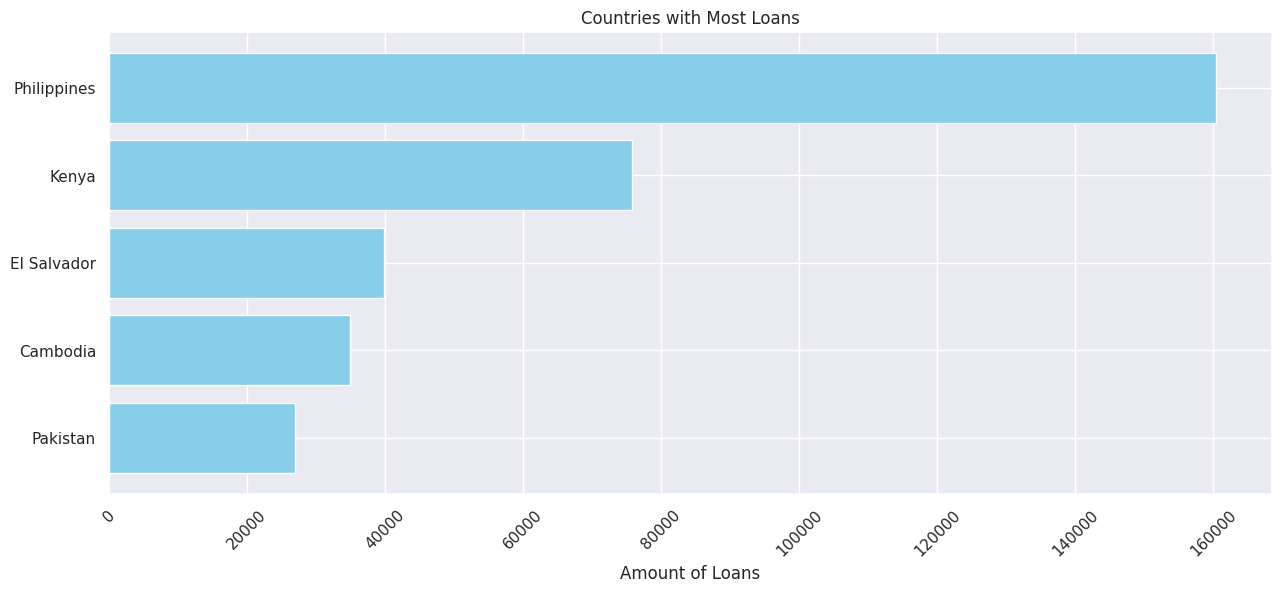

In [ ]:
# Plotting the bar chart for countries with most loans
plt.figure(figsize=(15, 6))
plt.barh(countries_loan_counts.index, countries_loan_counts.values, color='skyblue')
plt.xlabel('Amount of Loans')
plt.title('Countries with Most Loans')
# Rotate x-axis tick labels
plt.xticks(rotation=45)
plt.gca().invert_yaxis()


## Insight 1 : Philippines has taken the most number of loans

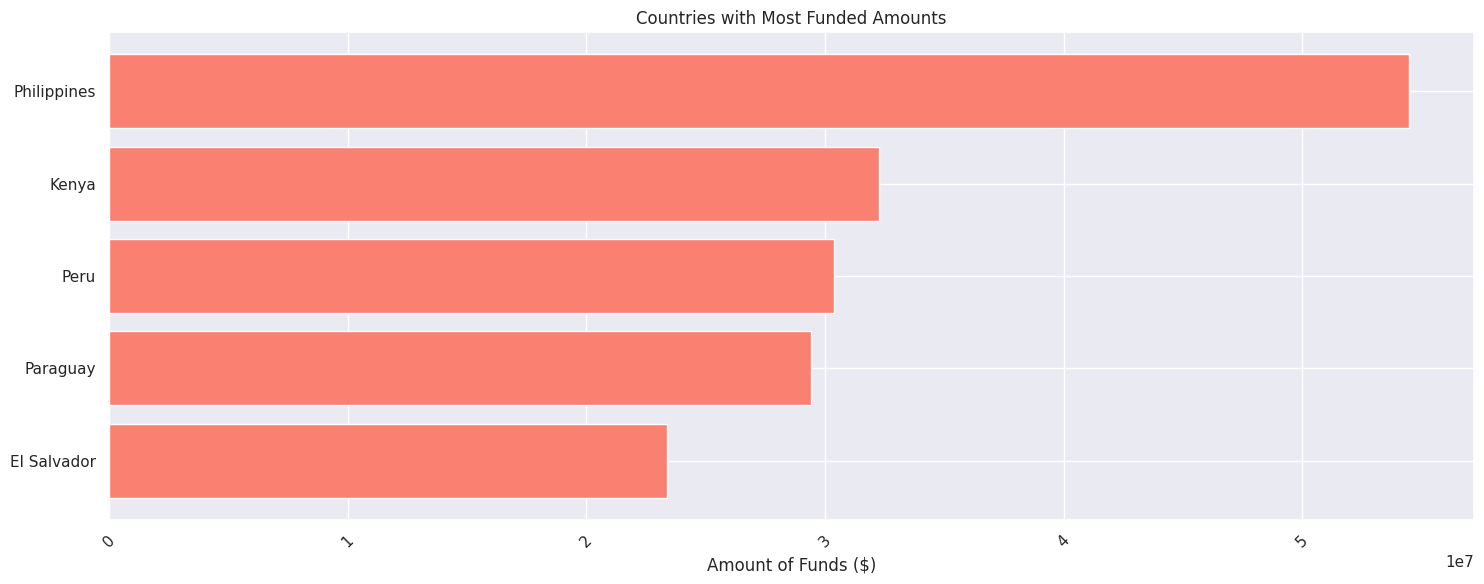

In [ ]:
# Plotting the bar chart for countries with most funded amounts
plt.figure(figsize=(15, 6))  # Adjust the width as needed
plt.barh(countries_donation_amounts.index, countries_donation_amounts.values, color='salmon')
plt.xlabel('Amount of Funds ($)')
plt.title('Countries with Most Funded Amounts')
# Rotate x-axis tick labels
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Insight 2 : Philippines has taken the Highest loan amount

In [ ]:
countries_donation_amounts

country
Philippines    54476375.0
Kenya          32248405.0
Peru           30394850.0
Paraguay       29412700.0
El Salvador    23357725.0
Name: funded_amount, dtype: float64

### Analysis of the Countries with the most number of loans & the highest loan amount

### Dataframe containing the details of the countries with the maximum loan amount is being created

In [ ]:
selected_countries = ['Philippines','Kenya','Peru', 'Paraguay', 'El Salvador']

filtered_kiva_loans = kiva_loans[(kiva_loans['country'].isin(selected_countries)) ]
filtered_kiva_loans.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


In [ ]:
filtered_kiva_loans["country"].unique()

array(['Kenya', 'El Salvador', 'Philippines', 'Peru', 'Paraguay'],
      dtype=object)

### 2. Percentage wise distribution of number of loans for the countries with most loans

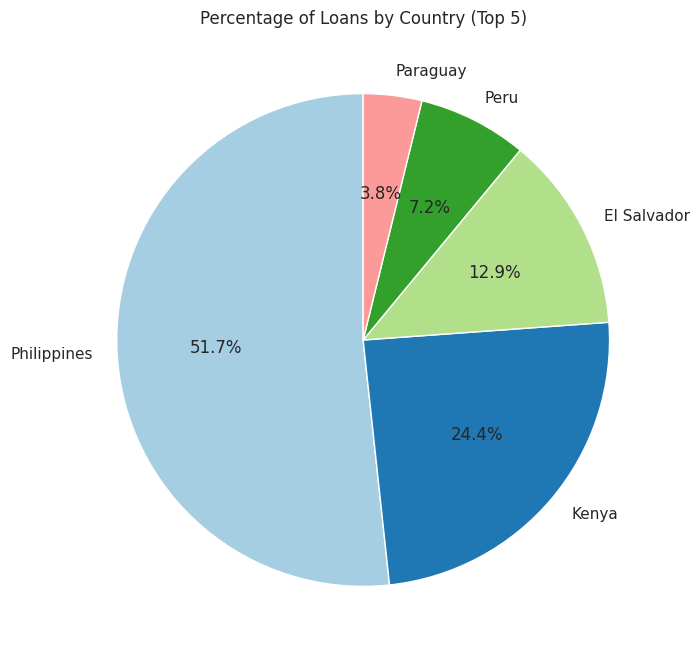

In [ ]:
# Calculate the top 5 countries with the most loans
top_countries = filtered_kiva_loans['country'].value_counts().head(5).index

# Filter the DataFrame for the top 5 countries
top_countries_loans = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]

# Calculate loan percentages
loan_percentages = top_countries_loans['country'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_percentages, labels=loan_percentages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Loans by Country (Top 5)')
plt.show()


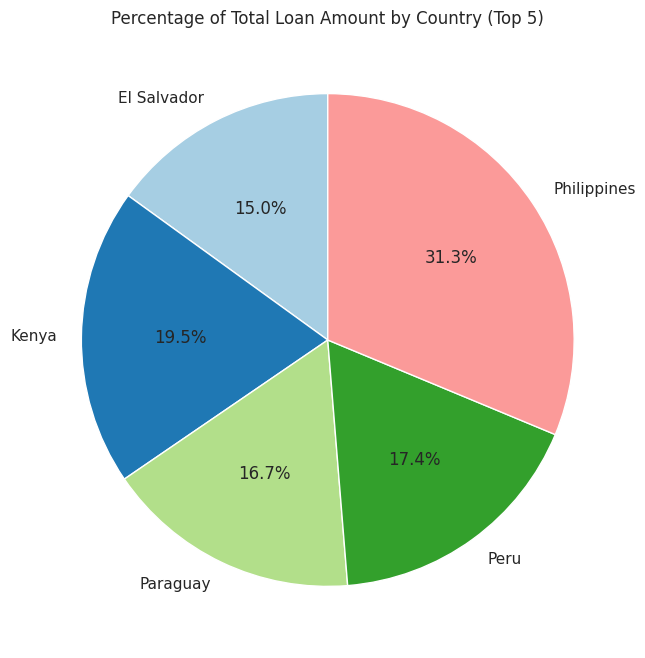

In [ ]:
# Calculate the top 5 countries with the most loans
top_countries = filtered_kiva_loans['country'].value_counts().head(5).index

# Filter the DataFrame for the top 5 countries
top_countries_loans = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]

# Calculate the total loan amount for each country
total_loan_amounts = top_countries_loans.groupby('country')['loan_amount'].sum()

# Plotting the pie chart based on total loan amount
plt.figure(figsize=(8, 8))
plt.pie(total_loan_amounts, labels=total_loan_amounts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Total Loan Amount by Country (Top 5)')
plt.show()


In [ ]:
total_loan_amounts

country
El Salvador    26603650.0
Kenya          34534300.0
Paraguay       29629075.0
Peru           30867400.0
Philippines    55342225.0
Name: loan_amount, dtype: float64

### 3. Regions with Most number of loans & Maximum loan Amounts from the Top 5 countries with most loans & highest loan amounts

In [ ]:
filtered_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


In [ ]:
# Find and replace "CUSCO" with "Cusco" in the 'region' column
filtered_kiva_loans['region'] = filtered_kiva_loans['region'].replace('CUSCO', 'Cusco')

In [ ]:
regions_loan_counts = filtered_kiva_loans['region'].value_counts().head(5).sort_values(ascending=False)
regions_donation_amounts = filtered_kiva_loans.groupby(['region'])['funded_amount'].sum().sort_values(ascending=False).head(5)

In [ ]:
regions_loan_counts

Cusco              5555
Kisii              3546
Palo, Leyte        3320
Narra, Palawan     3197
Quezon, Palawan    3120
Name: region, dtype: int64

In [ ]:
regions_donation_amounts

region
Cusco              8710625.0
Ita                2559775.0
Ciudad del Este    2455400.0
Encarnación        2224275.0
Caaguazú           2149100.0
Name: funded_amount, dtype: float64

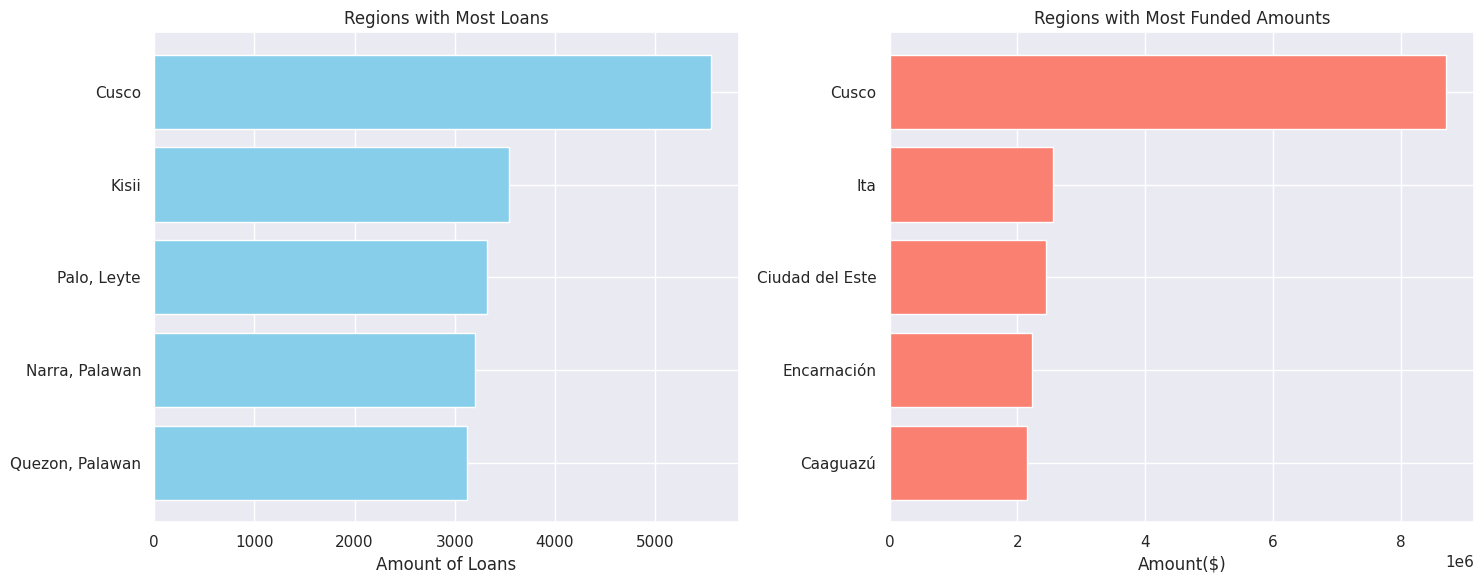

In [ ]:
# Plotting the bar chart for regions with most loans
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(regions_loan_counts.index, regions_loan_counts.values, color='skyblue')
plt.xlabel('Amount of Loans')
plt.title('Regions with Most Loans')
plt.gca().invert_yaxis()

# Plotting the bar chart for regions with most funded amounts
plt.subplot(1, 2, 2)
plt.barh(regions_donation_amounts.index, regions_donation_amounts.values, color='salmon')
plt.xlabel('Amount($)')
plt.title('Regions with Most Funded Amounts')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
regions_loan_counts_country = filtered_kiva_loans.groupby(['region', 'country'])['funded_amount'].count().reset_index()

regions_donation_amounts_country = filtered_kiva_loans.groupby(['region', 'country'])['funded_amount'].sum().reset_index()

### Countries for regions with highest number of loans

In [ ]:
regions_of_interest = ['Cusco', 'Kisii', 'Palo, Leyte', 'Narra, Palawan', 'Quezon, Palawan']

# Filter the dataset for the regions of interest
filtered_regions_data = filtered_kiva_loans[filtered_kiva_loans['region'].isin(regions_of_interest)]

# Get unique countries for each region
countries_by_region = filtered_regions_data.groupby('region')['country'].unique()

# Display the result
for region, countries in countries_by_region.items():
    print(f"{region}: {', '.join(countries)}")


Cusco: Peru
Kisii: Kenya
Narra, Palawan: Philippines
Palo, Leyte: Philippines
Quezon, Palawan: Philippines


### Countries for regions with highest loan amounts

In [ ]:
regions_of_interest = ['Cusco', 'Ita', 'Ciudad del Este', 'Encarnación', 'Caaguazú']

# Filter the dataset for the regions of interest
filtered_regions_data = filtered_kiva_loans[filtered_kiva_loans['region'].isin(regions_of_interest)]

In [ ]:
# Display the result
for region in regions_of_interest:
    region_data = filtered_regions_data[filtered_regions_data['region'] == region]

    total_loan_amount = region_data['funded_amount'].sum()
    countries = region_data['country'].unique()

    print(f"{region}: Total Loan Amount = {total_loan_amount}, Country = {', '.join(countries)}")


Cusco: Total Loan Amount = 8710625.0, Country = Peru
Ita: Total Loan Amount = 2559775.0, Country = Paraguay
Ciudad del Este: Total Loan Amount = 2455400.0, Country = Paraguay
Encarnación: Total Loan Amount = 2224275.0, Country = Paraguay
Caaguazú: Total Loan Amount = 2149100.0, Country = Paraguay


### Regions from philippines with the most number of loans

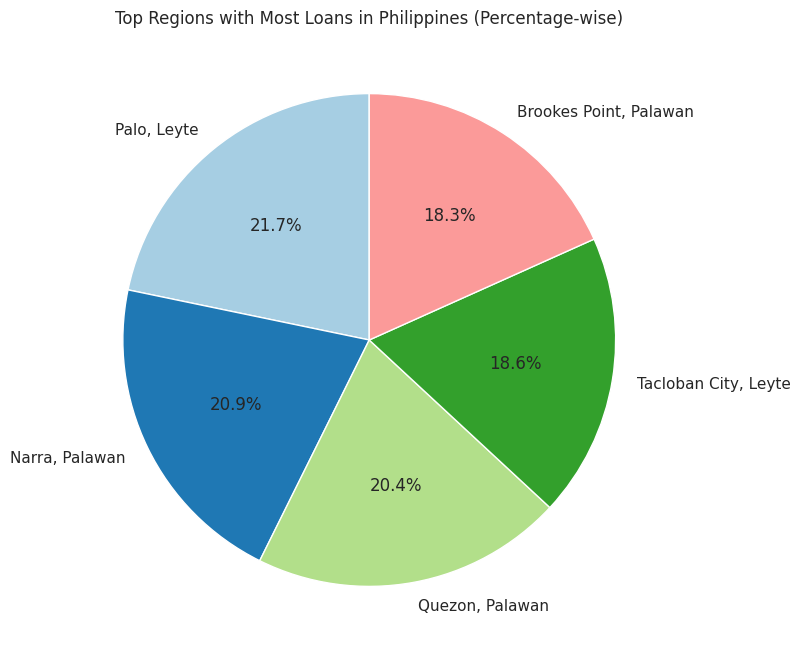

In [ ]:
# Find the country with the most number of loans
top_country = filtered_kiva_loans['country'].value_counts().idxmax()

# Filter the DataFrame for loans from the top country
top_country_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == top_country]

# Calculate the top regions with the most number of loans
top_regions = top_country_loans['region'].value_counts().head()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top Regions with Most Loans in {} (Percentage-wise)'.format(top_country))
plt.show()


### 4.Repayment intervals for the countries with the Highest loan amounts

<Figure size 1500x600 with 0 Axes>

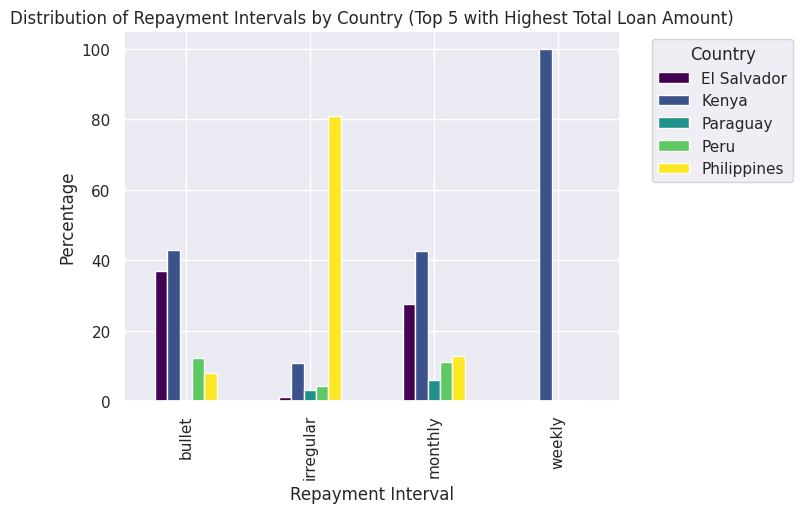

In [ ]:
# Calculate the total loan amount for each country
total_loan_amounts = filtered_kiva_loans.groupby('country')['loan_amount'].sum()

# Select the top countries with the highest total loan amount
top_countries = total_loan_amounts.nlargest(5).index

# Filter the DataFrame for loans from the top countries
filtered_top_countries_loans = filtered_kiva_loans[filtered_kiva_loans['country'].isin(top_countries)]

# Create a DataFrame with the cross-tabulation for the top countries
cross_tab = pd.crosstab(filtered_top_countries_loans['repayment_interval'], filtered_top_countries_loans['country'])

# Normalize the values to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
plt.figure(figsize=(15, 6))
cross_tab_percentage.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Distribution of Repayment Intervals by Country (Top 5 with Highest Total Loan Amount)')
plt.xlabel('Repayment Interval')
plt.ylabel('Percentage')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


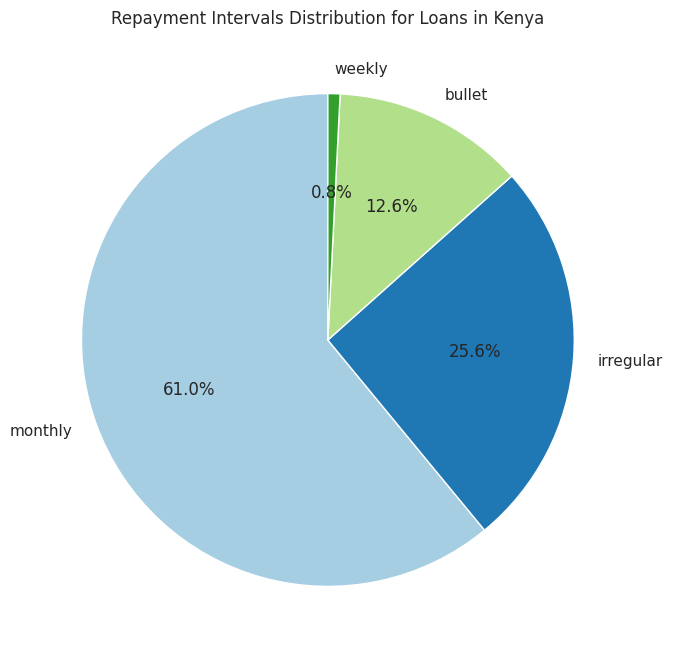

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the percentage-wise distribution of repayment intervals in Kenya
repayment_distribution = kenya_loans['repayment_interval'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Kenya')
plt.show()


## Insight 3 - Kenya is the country with the highest percentage for regular payment intervals

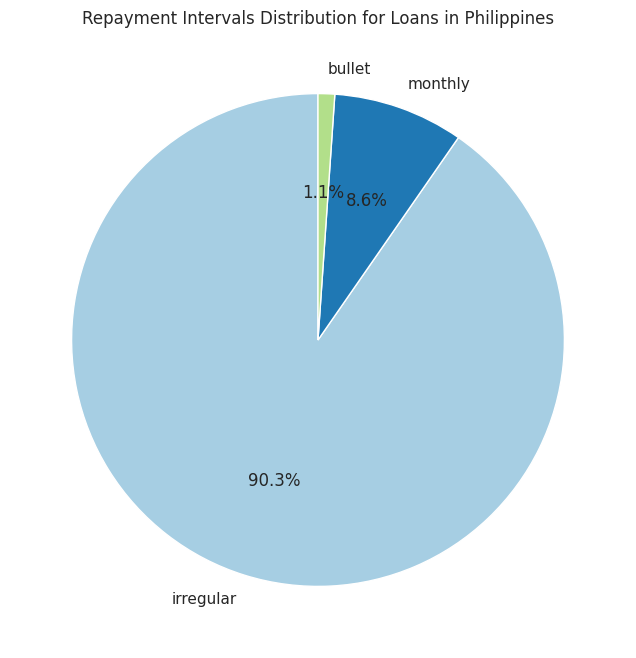

In [ ]:
# Filter the DataFrame for loans from philippines
philippines_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Philippines']

# Calculate the percentage-wise distribution of repayment intervals in philippines
repayment_distribution = philippines_loans['repayment_interval'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Philippines')
plt.show()

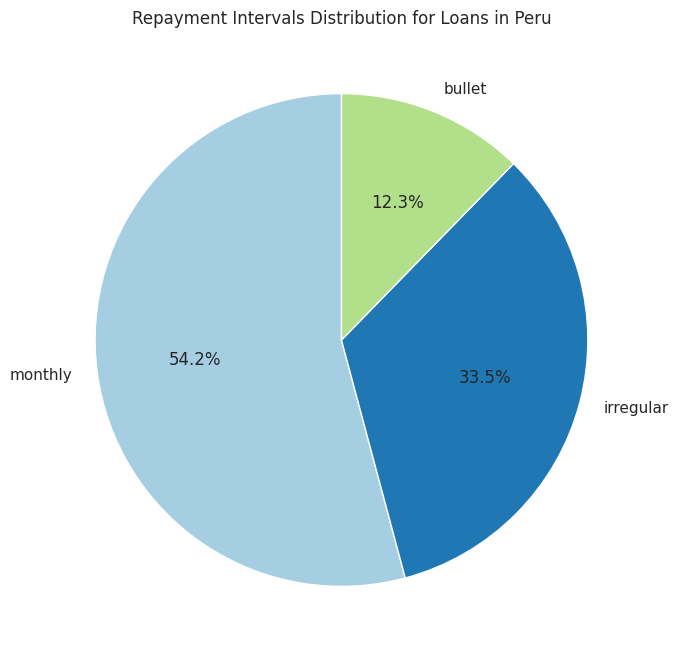

In [ ]:
# Filter the DataFrame for loans from peru
peru_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Peru']

# Calculate the percentage-wise distribution of repayment intervals in peru
repayment_distribution = peru_loans['repayment_interval'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(repayment_distribution, labels=repayment_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Repayment Intervals Distribution for Loans in Peru')
plt.show()

In [ ]:
# Filter the DataFrame for loans with regular repayment intervals
regular_payments = kiva_loans[kiva_loans['repayment_interval'] == 'monthly']

# Find the country with the highest number of regular repayment intervals
country_highest_regular_payments = regular_payments['country'].value_counts().idxmax()

# Display the result
print("Country with the Highest Number of Regular Payment Intervals: {}".format(country_highest_regular_payments))

Country with the Highest Number of Regular Payment Intervals: Kenya


In [ ]:
# Filter the DataFrame for loans with regular repayment intervals
regular_payments = kiva_loans[kiva_loans['repayment_interval'] == 'irregular']

# Find the country with the highest number of regular repayment intervals
country_highest_regular_payments = regular_payments['country'].value_counts().idxmax()

# Display the result
print("Country with the Highest Number of Regular Payment Intervals: {}".format(country_highest_regular_payments))

Country with the Highest Number of Regular Payment Intervals: Philippines


## Insight 4 - Country with the highest percentage of irregular payment interval is philippines

### Top 3 countries with regular payment intervals among the countries with the highest loan amounts

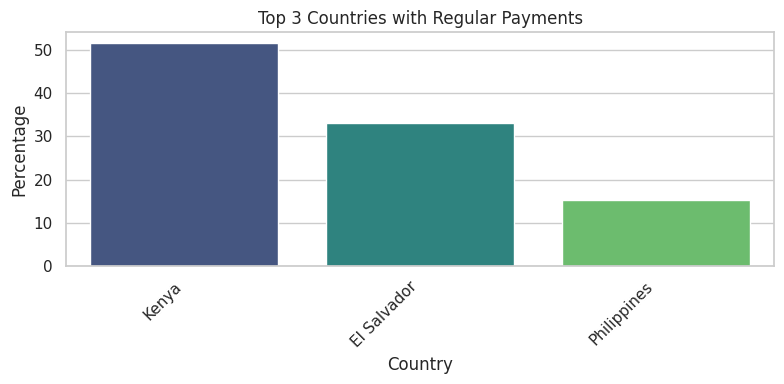

In [ ]:
# Filter the dataset for regular payments
regular_payment_countries = filtered_kiva_loans[filtered_kiva_loans['repayment_interval'] == 'monthly']

# Get the top 3 countries with regular payments
top_countries = regular_payment_countries['country'].value_counts().head(3).index

# Filter the dataset for these top 3 countries
top_countries_data = regular_payment_countries[regular_payment_countries['country'].isin(top_countries)]

# Calculate percentage distribution
percentage_distribution = (top_countries_data['country'].value_counts(normalize=True) * 100).reset_index()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart using sns.barplot
plt.figure(figsize=(8, 4))
sns.barplot(x='index', y='country', data=percentage_distribution, palette='viridis')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 3 Countries with Regular Payments')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 5. Further Analysis would be focused on Kenya as it is the country with the highest percentage for regular payment interval

### 5. Top Sectors with Most number of Loans from Kenya


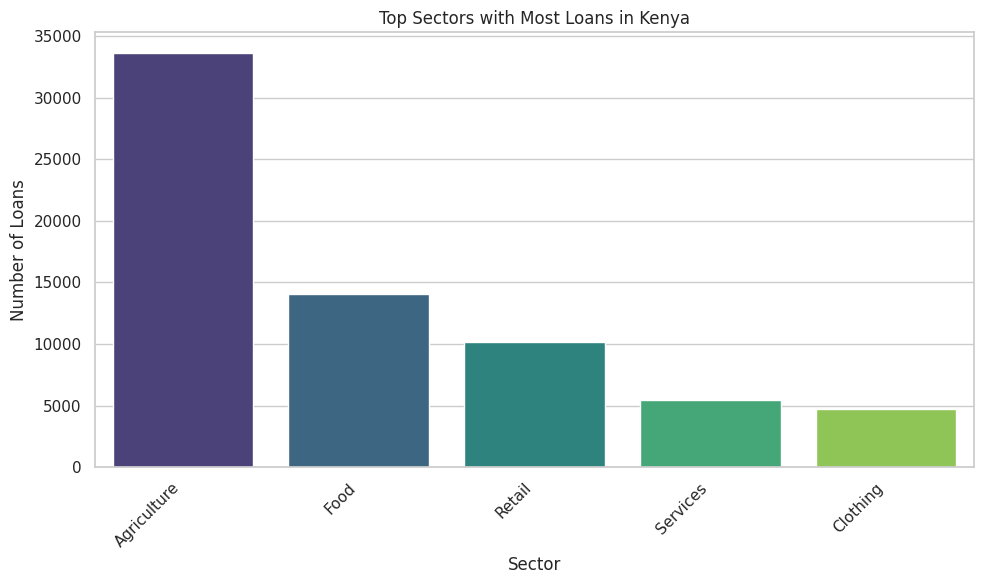

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Get the top sectors with the most number of loans
top_sectors = kenya_loans['sector'].value_counts().head()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Top Sectors with Most Loans in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


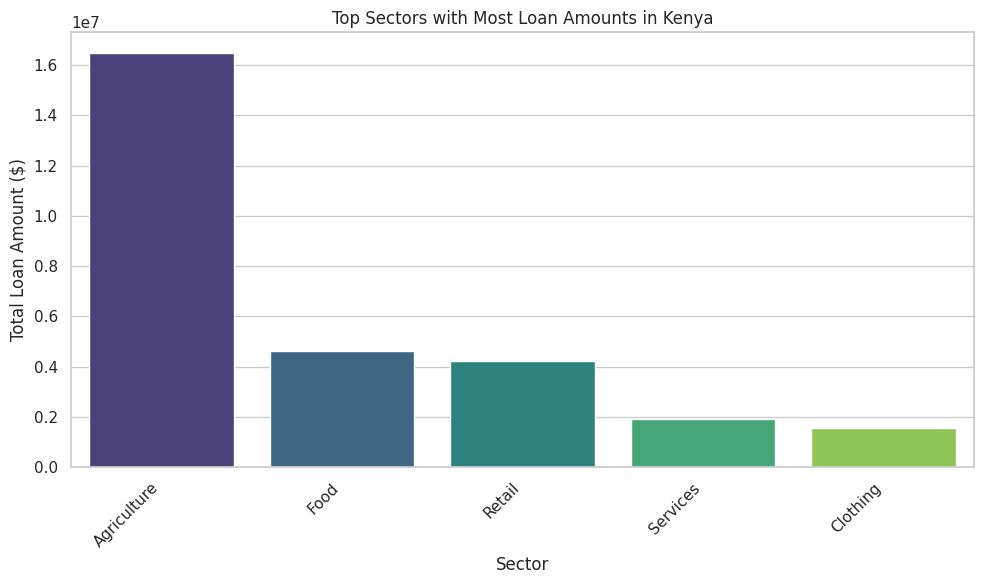

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = kiva_loans[kiva_loans['country'] == 'Kenya']

# Calculate the total loan amount for each sector in Kenya
sector_loan_amounts = kenya_loans.groupby('sector')['funded_amount'].sum().sort_values(ascending=False).head()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_loan_amounts.index, y=sector_loan_amounts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount ($)')
plt.title('Top Sectors with Most Loan Amounts in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Insight 5 - Agriculture, Food & Retail are the top 3 sectors in Kenya in terms of most number of loans & highest loan amounts

### Top regions with most number of loans & highest loan amounts in Kenya

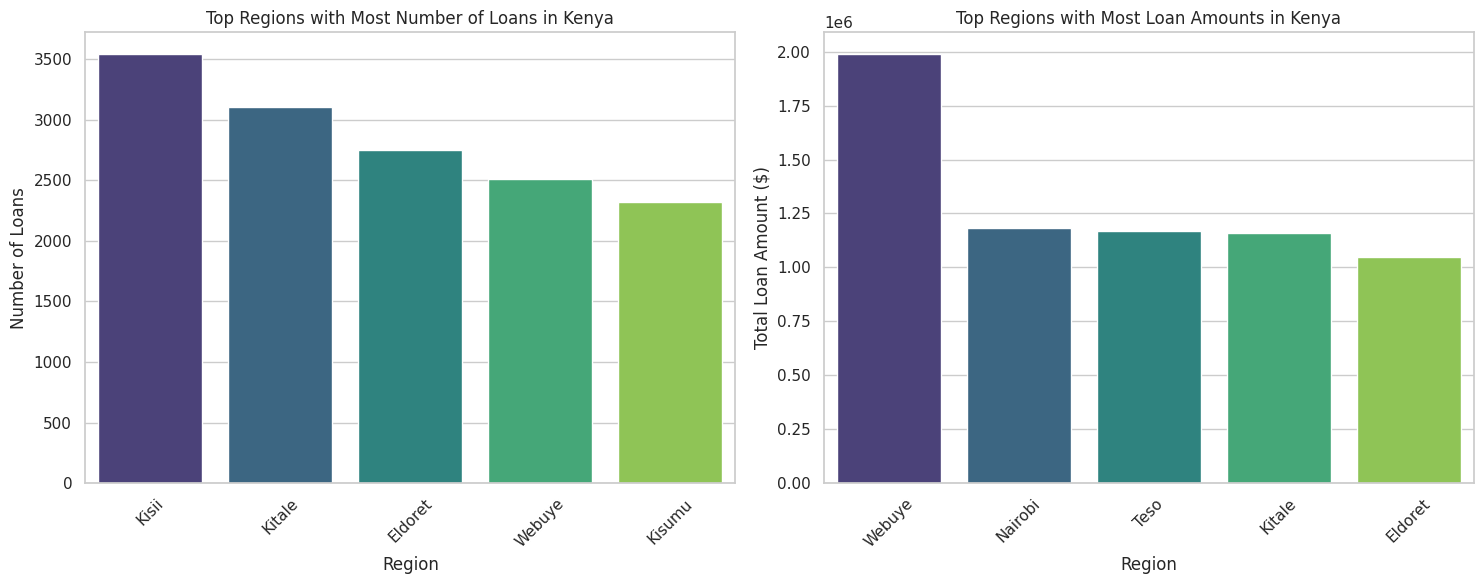

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top regions with the most number of loans
top_regions_loans = kenya_loans['region'].value_counts().head()

# Calculate the top regions with the most loan amounts
top_regions_loan_amounts = kenya_loans.groupby('region')['funded_amount'].sum().sort_values(ascending=False).head()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create subplots for the two charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the top regions by number of loans
sns.barplot(x=top_regions_loans.index, y=top_regions_loans.values, palette='viridis', ax=axes[0])
axes[0].set_title('Top Regions with Most Number of Loans in Kenya')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Number of Loans')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the top regions by loan amounts
sns.barplot(x=top_regions_loan_amounts.index, y=top_regions_loan_amounts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Top Regions with Most Loan Amounts in Kenya')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Loan Amount ($)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


### Popular sectors in a particular region in Kenya

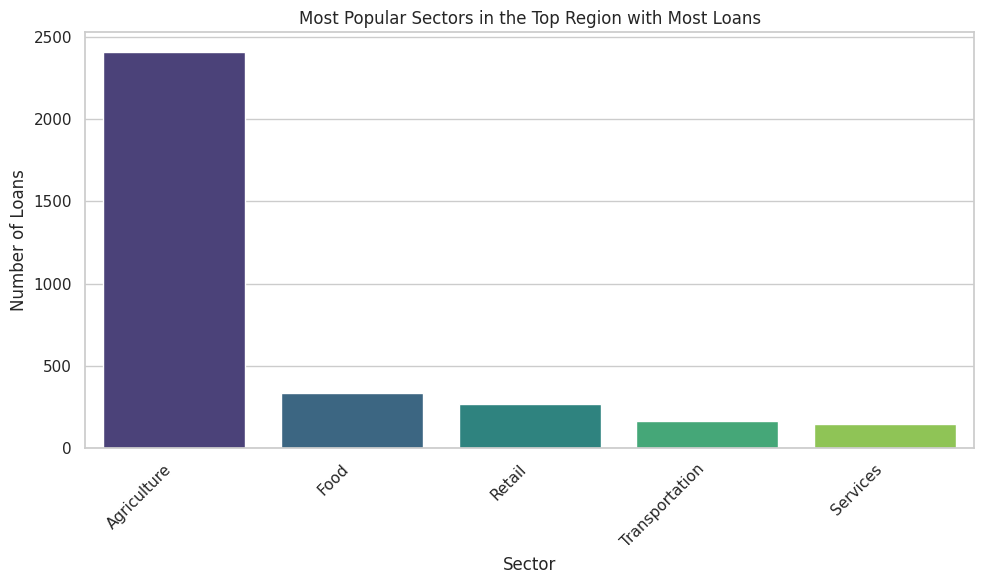

In [ ]:
# Filter the DataFrame for loans from the top region
top_region_loans = kiva_loans[kiva_loans['region'] == "Kisii"]

# Calculate the most popular sectors in the top region
top_sector_counts = top_region_loans['sector'].value_counts().head()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sector_counts.index, y=top_sector_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Loans')
plt.title('Most Popular Sectors in the Top Region with Most Loans')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Insight 6 - Agriculture, Food & Retail remain the top sectors in the region of kenya with most number of loans

### 6. Top activities & uses of loans in kenya

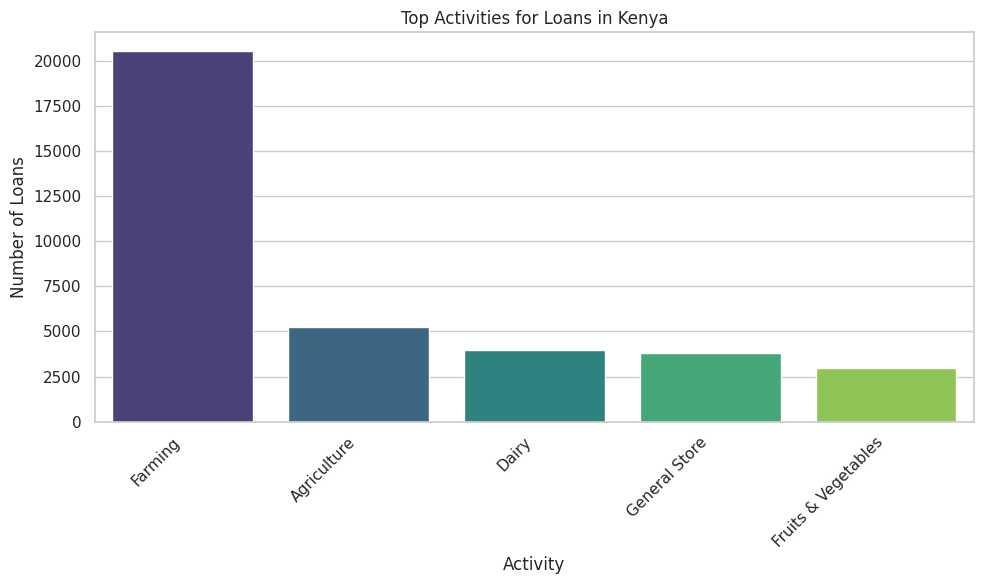

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top activities with the most number of loans
top_activities = kenya_loans['activity'].value_counts().head()

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities.index, y=top_activities.values, palette='viridis')

# Set labels and title
plt.xlabel('Activity')
plt.ylabel('Number of Loans')
plt.title('Top Activities for Loans in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Insight 7 - Farming, agriculture & dairy are the top 3 activities done with loans in Kenya

In [ ]:
filtered_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,2014-01-02 18:40:01+00:00,13.0,7,#Vegan,female,irregular,2014-01-02
49,653418,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,81.0,2014-01-02 22:17:55+00:00,2013-12-21 08:00:00+00:00,2014-01-30 00:19:42+00:00,14.0,18,"#Repeat Borrower, user_favorite",male,monthly,2014-01-02
51,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
52,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02


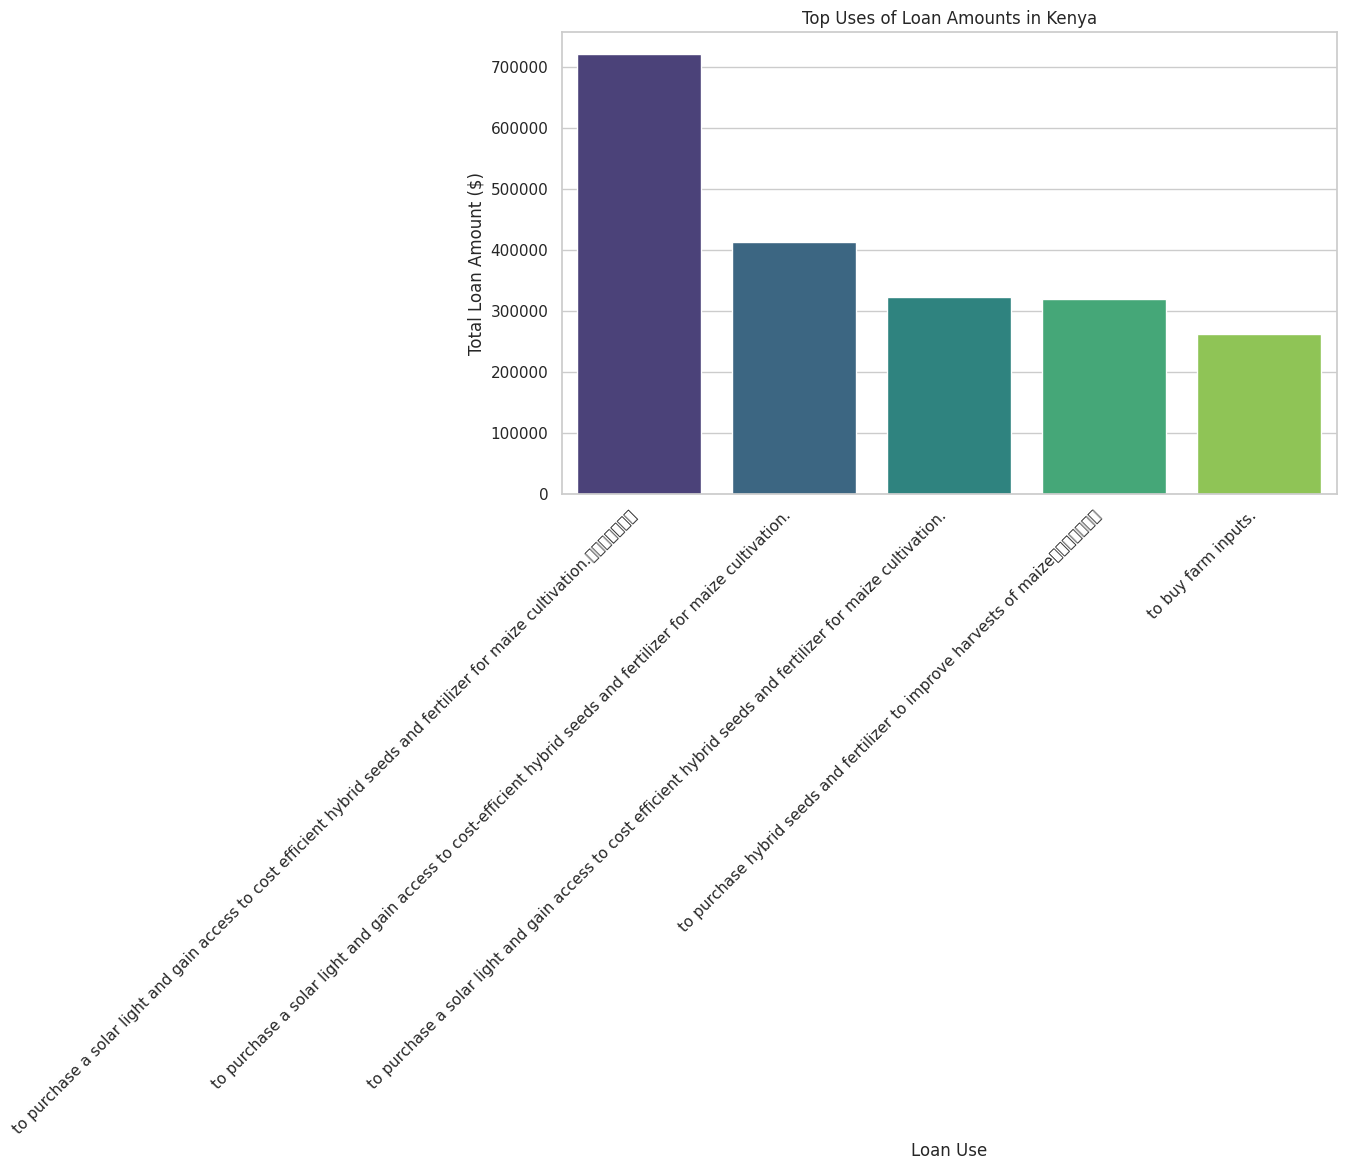

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Calculate the top uses of loan amounts in Kenya
top_loan_uses = kenya_loans.groupby('use')['loan_amount'].sum().nlargest(5)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_loan_uses.index, y=top_loan_uses.values, palette='viridis')

# Set labels and title
plt.xlabel('Loan Use')
plt.ylabel('Total Loan Amount ($)')
plt.title('Top Uses of Loan Amounts in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


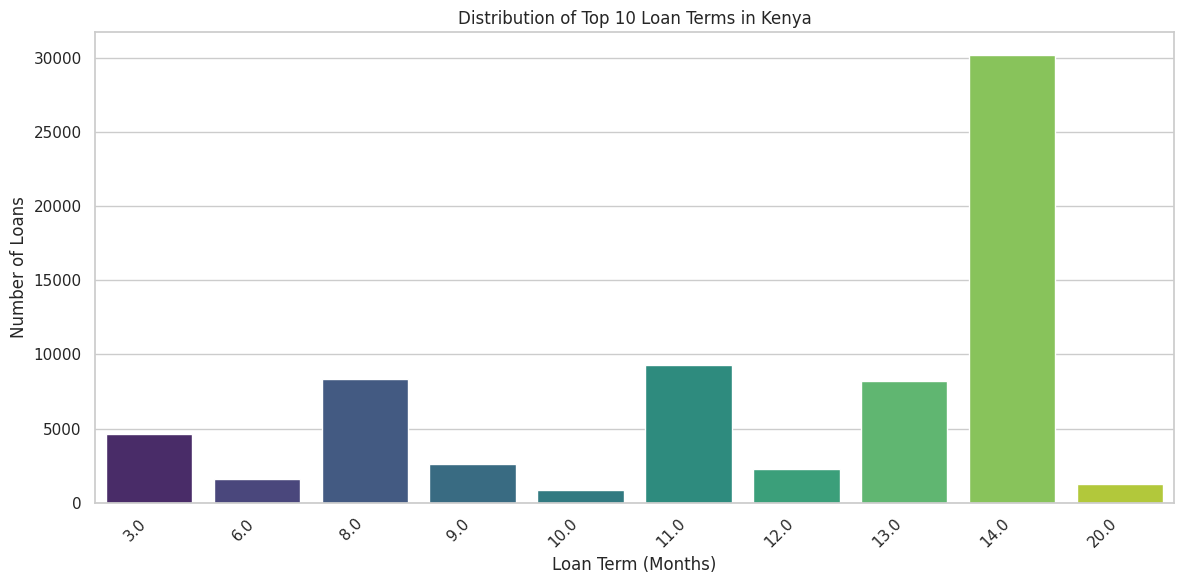

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = kiva_loans[kiva_loans['country'] == 'Kenya']

# Get the top 10 loan terms
top_loan_terms = kenya_loans['term_in_months'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 loan terms
kenya_top_loan_terms = kenya_loans[kenya_loans['term_in_months'].isin(top_loan_terms)]

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='term_in_months', data=kenya_top_loan_terms, palette='viridis')

# Set labels and title
plt.xlabel('Loan Term (Months)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Top 10 Loan Terms in Kenya')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


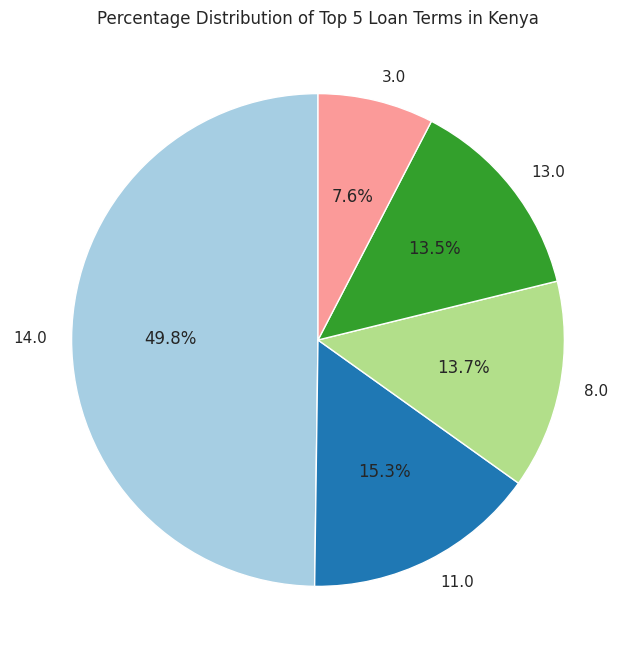

In [ ]:
# Filter the DataFrame for loans from Kenya
kenya_loans = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']

# Get the top 5 loan terms
top_loan_terms = kenya_loans['term_in_months'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 loan terms
kenya_top_loan_terms = kenya_loans[kenya_loans['term_in_months'].isin(top_loan_terms)]

# Calculate the percentage distribution
term_percentage = kenya_top_loan_terms['term_in_months'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(term_percentage, labels=term_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Top 5 Loan Terms in Kenya')
plt.show()


 We can see that the distribution of borrower’s repayment is imbalanced. The 'irregular' repayment interval (25.6 %)  appears to have a much higher count compared to others. The 'weekly' repayment interval (0.8 %)  has a very small percentage, You can observe the relative proportions of 'monthly' (61.0 %) and 'bullet' (12.6 %) repayment intervals compared to the overall distribution.

### 7. Top Uses of the Loans


In [ ]:
Kenya_country = filtered_kiva_loans[filtered_kiva_loans['country'] == 'Kenya']
## I noticed that some of the data is inconsistant and are basically repeated because of upper/lower case difference.
Kenya_country.use = Kenya_country.use.str.lower()
## Also I stumbled upon lines where the only difference is a ".". So, I got rid of the difference.
Kenya_country.use =Kenya_country.use.str.strip('.')
## Its always a good idea to get rid of any extra white spaces.
Kenya_country.use =Kenya_country.use.str.strip()
Kenya_country.use = Kenya_country.use.str.strip('.')

##There are different version so saying the same thing. therefore I have decided to merge them all together.
Kenya_country.replace('to buy a water filter to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for his family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter, to provide safe drinking water for her family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter, to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water for their families', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to purchase a water filter to provide safe drinking water for the family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to purchase a water filter to provide safe drinking water', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)
Kenya_country.replace('to buy a water filter in order to provide safe drinking water for their family', 'to buy a water filter to provide safe drinking water for his/her/their family', inplace = True)

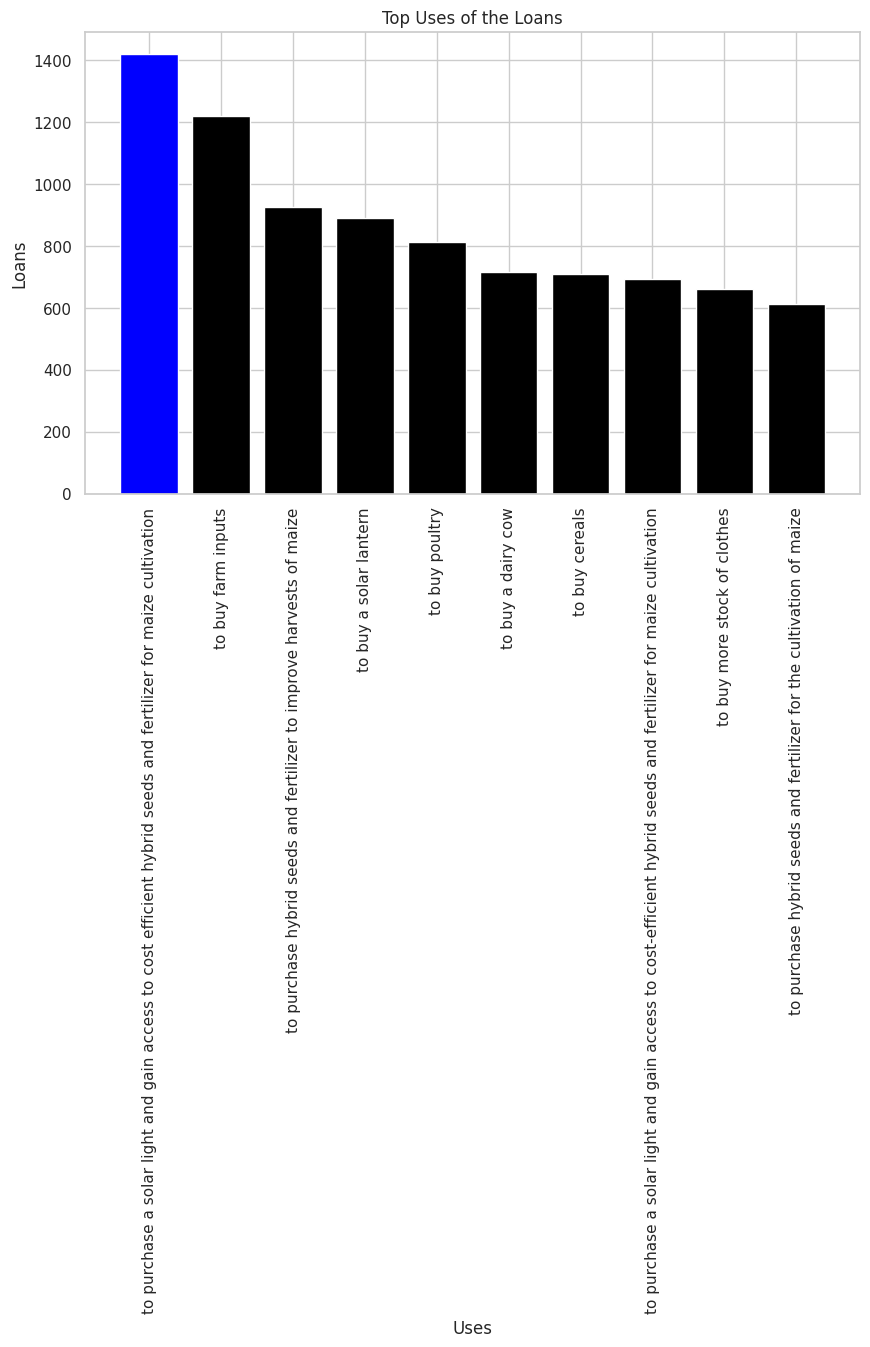

In [ ]:
temp =Kenya_country.use.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(temp.index, temp.values, color=['blue', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'])

plt.title("Top Uses of the Loans")
plt.xlabel("Uses")
plt.ylabel("Loans")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


### Insight

### 8. Male-Female Ratio

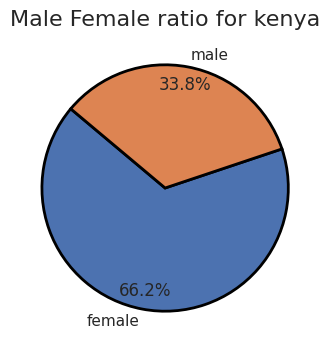

In [ ]:
Kenya_country
temp = pd.DataFrame(Kenya_country.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()

labels = temp.gender
values = temp.total

plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})

plt.title("Male Female ratio for kenya", fontsize=16)
plt.show()


## Insight

<hr>
<hr>
<hr>
<hr>

From this chart, we can see that 66.2 % of females age making regular payments as compared to male(33.8 %)

In [ ]:
countries.replace("Congo, Dem. Rep.", 'Democratic Republic of the Congo', inplace=True)

countries.rename(columns = {'GDP ($ per capita)':"GDP"}, inplace = True)
countries.rename(columns = {'Pop. Density (per sq. mi.)':"pop_density_per_sq_mile"}, inplace = True)
countries.pop_density_per_sq_mile = countries.pop_density_per_sq_mile.apply(lambda x: int(x.replace(",","")))
countries.Country = countries.Country.apply(lambda x:x.strip())
country_stats = country_stats.merge(countries[['Country',"GDP",'pop_density_per_sq_mile']], left_on ='country_name',right_on='Country', how='left')


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

### 9. Most Populated regions in Kenya

In [ ]:
# Merge the datasets on the common columns 'country' and 'Country'
merged_data = pd.merge(Kenya_country, countries, left_on='country', right_on='Country', how='left')

# Group data by region and sum up the populations
region_data = merged_data.groupby('region')['Population'].sum().reset_index()

# Sort data by population in descending order and select top 5
top5_regions = region_data.sort_values(by='Population', ascending=False).head(5)

# Plot the bar graph
sns.barplot(x='region',y='Population', data=top5_regions)

# Customize the plot
plt.title('Top 5 Populated Regions in Kenya')
plt.xlabel('Population')
plt.ylabel('Region')

# Show the plot
plt.show()


TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

From above graph we can see that Kissi, Kitale, Eldoret , Webuye and Kisumu are most populated regions from kenya country.

Other Insights:


13.Population Density

In [ ]:
temp = country_stats[['kiva_country_name','pop_density_per_sq_mile','population','population_below_poverty_line']].sort_values(by = 'population', ascending = False).head(14)
for col in temp.columns:
    temp[col] = temp[col].astype(str)
temp['text'] = temp['kiva_country_name'] + '<br>' + 'Population Density(per sq/ml): ' + temp['pop_density_per_sq_mile'] + '<br>' + 'Total Populations: ' + temp['population'] + '<br>' + 'Population Below Poverty Line: ' + temp['population_below_poverty_line']
temp['pop_density_per_sq_mile'] = temp['pop_density_per_sq_mile'].astype(float)
temp['population_below_poverty_line'] = temp['population_below_poverty_line'].astype(float)
trace0 = go.Scatter(
    x=temp.population,
    y=temp.population_below_poverty_line,
    text = temp.text,
    mode='markers',
    marker = { 'color': temp.population_below_poverty_line.tolist(),
            #'colorscale':"RdYlGn",
            'size': (temp.pop_density_per_sq_mile/80).tolist(),
            'showscale': False,
            'line': dict(width=2, color='black')
        }
)
layout = go.Layout(
    paper_bgcolor='rgb(243, 243, 200)',## asix and lebel background color
    plot_bgcolor='rgb(243, 243, 200)', ## plot background color
    title = "Population, Population Density and Population Below Poverty Line",
    height = 800,
    xaxis = dict(     title = "Population"
    ),
    yaxis = dict(
        title = "Population Below Poverty Line"
    )

)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig.show()

KeyError: "['pop_density_per_sq_mile'] not in index"

The big circle is the first thing to take my attention. Here **the size of the circle** represents the **population density** of each country while x and y-axis represent population and population below poverty line consecutively. That represents **Bangladesh** which is not only one of the countries with top populations but also one of the most densely populated countries in the world. In addition to that **Bangladesh** has a score of 31.5 in the Population below poverty line scale. Speaking of that scale, **Nigeria** is the poorest country with lots of people to appreciate assistance from KIVA.

14.Population Below Poverty Line


In [ ]:
data = [dict(
        type='choropleth',
        locations= country_stats.country_name,
        locationmode='country names',
        z=country_stats.population_below_poverty_line,
        text=country_stats.country_name,
        marker=dict(
#             colorscale='Red',
            line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='',
            title='Polulation<br>below<br>poverty<br>line'),
)]
layout = dict(title = 'Population Below Poverty Line',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

Most of the countries in Africa live way below poverty line. This may be a good time to bring up GDP per capita since they are nege.Let's create a map for that as well.

15.GDP Per Capita

In [ ]:
temp = countries[["Country","GDP"]].sort_values(by = 'GDP', ascending = False)
data = [dict(
        type='choropleth',
        locations= temp.Country,
        locationmode ='country names',
        z=temp.GDP,
        text=temp.Country,
        colorscale='BuGn',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(
#             autotick=False,
            tickprefix='', title='GDP<br>Per<br>Capita'),
)]
layout = dict(title = 'World countries with polulations',
             geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
#                 type = 'Mercatorodes'
            )
        ),)
fig = go.Figure(data=data, layout=layout)
fig.show()

**North American**, **Austrailan** and **European** countries are the ones with the highest GDP Per Capita. Meanwhile, countries in** Africa** and Asia are the ones with the lowest GDP Per Capita.

In [ ]:
kiva_loans['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [ ]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [ ]:
temp = pd.DataFrame(filtered_kiva_loans.borrower_genders.dropna().str.split(",").tolist()).stack().value_counts().reset_index()
temp.rename(columns={'index':'gender', 0:'total'}, inplace=True)
temp.gender = temp.gender.apply(lambda x: x.strip())
temp = temp.groupby(['gender'])['total'].sum().reset_index()
print(temp)


   gender   total
0  female  338069
1    male  105724


<Axes: xlabel='gender', ylabel='total'>

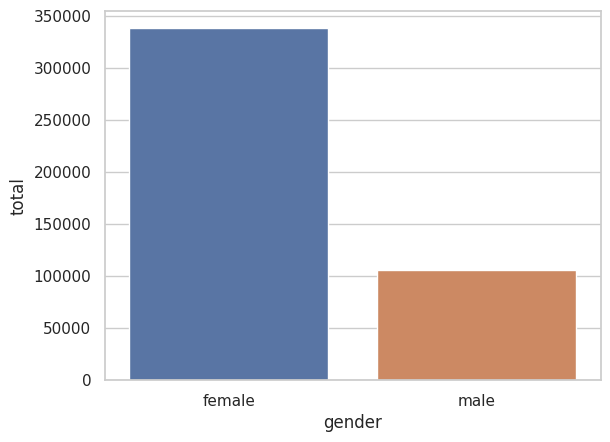

In [ ]:
sns.barplot(x='gender',y='total',data=temp)

In [ ]:
loan_themes['loan_theme_type'].nunique()

170

In [ ]:
loan_themes.columns

Index(['partner_id', 'field_partner_name', 'sector', 'loan_theme_id',
       'loan_theme_type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

From the above analysis, we concluded that the **Philippines** is the country that received the Most Funded Amounts i.e **62.07%** means **54,47,638 $ and  
    Kenya country is at rank second with the most Funded Amounts i.e. 29.33%** means** 32,000 $**. When we check which country makes regular payments **Kenya** country is at top country who makes** regular payments**. From Kenya country, 2.15% of loans are given to **Cusco** means,**1.37%** of loans are given to **Kisii**, and 1.28% of loans are given to Palo, and Leyte these are the regions with the most amount of funds.
       


For the next analysis, we choose these regions from Kenya country.

**

1.   Agriculture, Food, retail, Services,and Clothing** are the top sectors with the most loan counts.

2.Farming, Agriculture, Dairy, General store, and Retail are the top activities done by loan borrowers in Kenya country.

3.For Kenya CountryLoan payment is for 11 and 14 months.

4.We can see that the distribution of borrower’s repayment is imbalanced.






*   The 'irregular' repayment interval (25.6 %) appears to have a much higher count compared to others.

*   The 'weekly' repayment interval (0.8 %) is a very small percentage.

*   The relative proportions of 'monthly' (61.0 %) and

*   The  'bullet' (12.6 %) repayment intervals compared to the overall distribution.



**Uses of Loans**-

1.   Most people took loans to purchase a solar light and gain access to cost-efficient hybrid seed fertilizer for maize cultivation,

2.   To buy farm inputs, and

3.   To buy hybrid seeds and fertilizer to improve the harvest of maize.










*   Payment interval based on gender

 we can see that 66.2 % of females are making regular payments as compared to males (33.8 %).

*   We can see that Kissi, Kitale, Eldoret, Webuye, and Kisumu are the most populated regions in Kenya country.




**Other Insights:**

* High Density country-
Bangladesh is  with more densely populated country.
*   GDP per capita
    North American, Australian and European countries are the ones with the highest GDP Per Capita. Meanwhile, countries in Africa and Asia are the ones with the lowest GDP Per Capita.

*    Population below the poverty line-Nigeria is the poorest country with lots of people to appreciate assistance from KIVA.
Most of the countries in Africa live way below the poverty line.



